In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AffinityPropagation

#plt.style.use('tableau-colorblind10')
sns.set(font_scale=0.8)
%matplotlib widget

In [90]:
#Number of agents
N = 6

In [91]:
ifile = "params/N6/simulation_params_N6C0.01.dat"
plot_folder = "plots/"
plot_subfolder1 = "data_distribution/N6/" 

## Load data

In [92]:
df = pd.read_table(ifile, sep="\s+", header=None, names=['efficiency','inequality','n_efficiency','n_inequality','entropy','cond_entropy','frequency','info_per_agent','int_entropy','ineq_slope','emax_perc'])
df

,efficiency,inequality,n_efficiency,n_inequality,entropy,cond_entropy,frequency,info_per_agent,int_entropy,ineq_slope,emax_perc
0,0.431067,0.205735,0.107259,0.050383,0.188019,0.003119,0.500000,0.333333,0.997039,6.802538e-05,0.9940
1,0.316360,0.035698,0.142895,0.015913,0.590964,0.045244,0.090909,2.750000,0.870704,-2.567478e-05,0.7565
2,0.453255,0.217442,0.104913,0.050330,0.281755,0.003603,0.333333,1.666667,0.996257,6.651071e-06,0.9910
3,0.391333,0.121176,0.112146,0.034484,0.657196,0.050418,0.111111,2.750000,0.929387,-2.413761e-05,0.6150
4,0.295521,0.053179,0.137766,0.023291,0.524160,0.097016,0.125000,2.216667,0.778064,-3.321878e-05,0.2205
...,...,...,...,...,...,...,...,...,...,...,...
596,0.335494,0.069413,0.122757,0.025352,0.511113,0.055268,0.333333,3.116667,0.786279,-1.369616e-05,0.5510
597,0.313170,0.127215,0.093725,0.038082,0.574384,0.043633,0.166667,2.616667,0.862739,8.934433e-07,0.5705
598,0.367598,0.095513,0.112697,0.029112,0.490014,0.035537,0.200000,2.533333,0.820805,-1.846409e-05,0.5975
599,0.480004,0.269028,0.085188,0.047744,0.207784,0.004893,0.500000,34.966667,0.995240,4.073139e-06,0.9865


In [93]:
df['efficiency'].describe()

count    601.000000
mean       0.368947
std        0.049020
min        0.224696
25%        0.333368
50%        0.364931
75%        0.398547
max        0.498267
Name: efficiency, dtype: float64

In [94]:
#data_f = pd.read_csv("data/MFP_4medidas.csv")
#data_f.head()

In [95]:
#df = data_f[['efficiency','entropy','attendance','inequality']]

In [96]:
#df[(df['efficiency']<201) & (df['inequality']<50) & (df['info_per_agent']<=1)]

In [97]:
#df[(df['efficiency']>201) & (df['inequality']>200) & (df['entropy']<=0.1)]

In [98]:
#Filter out data where all agents choose 0 always or all agents choose 1 always
#df = df[(df['int_entropy']>0)].reset_index()
#df = df[(df['int_entropy']>0) & (df['info_per_agent']<=N)].reset_index()
#df

## Plot data

<Axes: xlabel='efficiency', ylabel='inequality'>

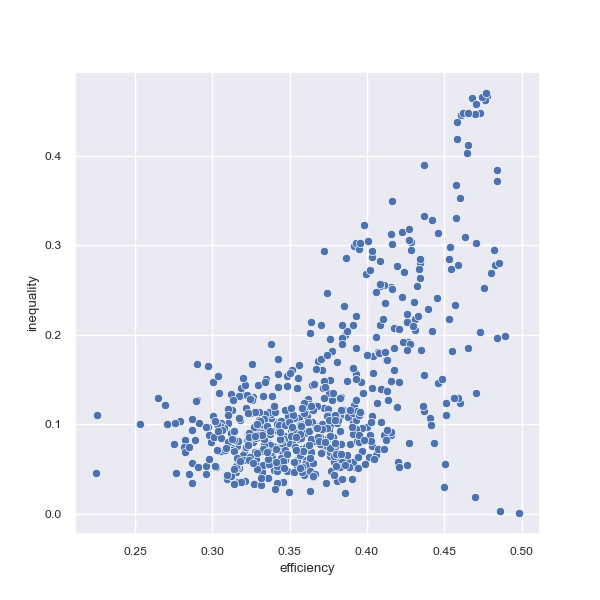

In [99]:
fig0, ax = plt.subplots(figsize=(6,6))
sns.scatterplot(data=df, ax=ax, x='efficiency', y='inequality')

## Standardize data

In [100]:
#df_std = df[['n_efficiency','n_inequality','entropy','info_per_agent']].apply(lambda x: x-np.mean(x))
#df_std = df_std.apply(lambda x: x/np.std(x))
#df_std.head()

In [101]:
#X_dat = df_std.to_numpy()
#X_dat.shape

In [102]:
df_red = df[['n_efficiency','n_inequality','entropy']]
#scaler = MinMaxScaler()
#scaler.fit(df_red)
X_dat = df_red.to_numpy() #scaler.transform(df_red)
X_dat.shape

(601, 3)

# 2D

## t-sne

In [103]:
from sklearn.manifold import TSNE

In [104]:
# Get t-sne embeding with 2 dimensions
tsne = TSNE(n_components=2,learning_rate='auto',perplexity=30,init='random')
tsne_result = tsne.fit_transform(X_dat)
tsne_result.shape

(601, 2)

In [105]:
df_tsne_res = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1]})
df_tsne_res = df_tsne_res.join(df)
df_tsne_res.head()

,tsne_1,tsne_2,efficiency,inequality,n_efficiency,n_inequality,entropy,cond_entropy,frequency,info_per_agent,int_entropy,ineq_slope,emax_perc
0,3.757878,-30.352438,0.431067,0.205735,0.107259,0.050383,0.188019,0.003119,0.500000,0.333333,0.997039,0.000068,0.9940
1,18.872349,9.415283,0.316360,0.035698,0.142895,0.015913,0.590964,0.045244,0.090909,2.750000,0.870704,-0.000026,0.7565
2,-15.841180,-25.247782,0.453255,0.217442,0.104913,0.050330,0.281755,0.003603,0.333333,1.666667,0.996257,0.000007,0.9910
3,31.599771,10.060238,0.391333,0.121176,0.112146,0.034484,0.657196,0.050418,0.111111,2.750000,0.929387,-0.000024,0.6150
4,2.160196,12.060427,0.295521,0.053179,0.137766,0.023291,0.524160,0.097016,0.125000,2.216667,0.778064,-0.000033,0.2205


In [106]:
df_tsne_res['cond_entropy'].describe()

count    601.000000
mean       0.022634
std        0.024585
min        0.000000
25%        0.002308
50%        0.011864
75%        0.038793
max        0.115051
Name: cond_entropy, dtype: float64

Pure segmentation: cond_entropy=0, entropy=0, efficiency=0.5, inequality=max\
Pure alternation: cond_entropy=0, entropy>0, efficiency=0.5, inequality=0


In [107]:
nbins = 10
xinf = df_tsne_res['efficiency'].min()
xsup = 0.5 #df_tsne_res['efficiency'].max()
yinf = df_tsne_res['cond_entropy'].min()
ysup = 0.2 #df_tsne_res['cond_entropy'].max()
x = np.linspace(xinf,xsup,nbins)
y = np.linspace(yinf,ysup,nbins)
lefce = np.zeros((nbins,nbins))
for i in range(nbins-1):
    for j in range(nbins-1):
        df_1 = df_tsne_res[(df_tsne_res['efficiency']>=x[i]) & (df_tsne_res['efficiency']<=x[i+1]) &
                           (df_tsne_res['cond_entropy']>=y[j]) & (df_tsne_res['cond_entropy']<=y[j+1])]
        lefce[i,j] = df_1.shape[0]/df.shape[0]

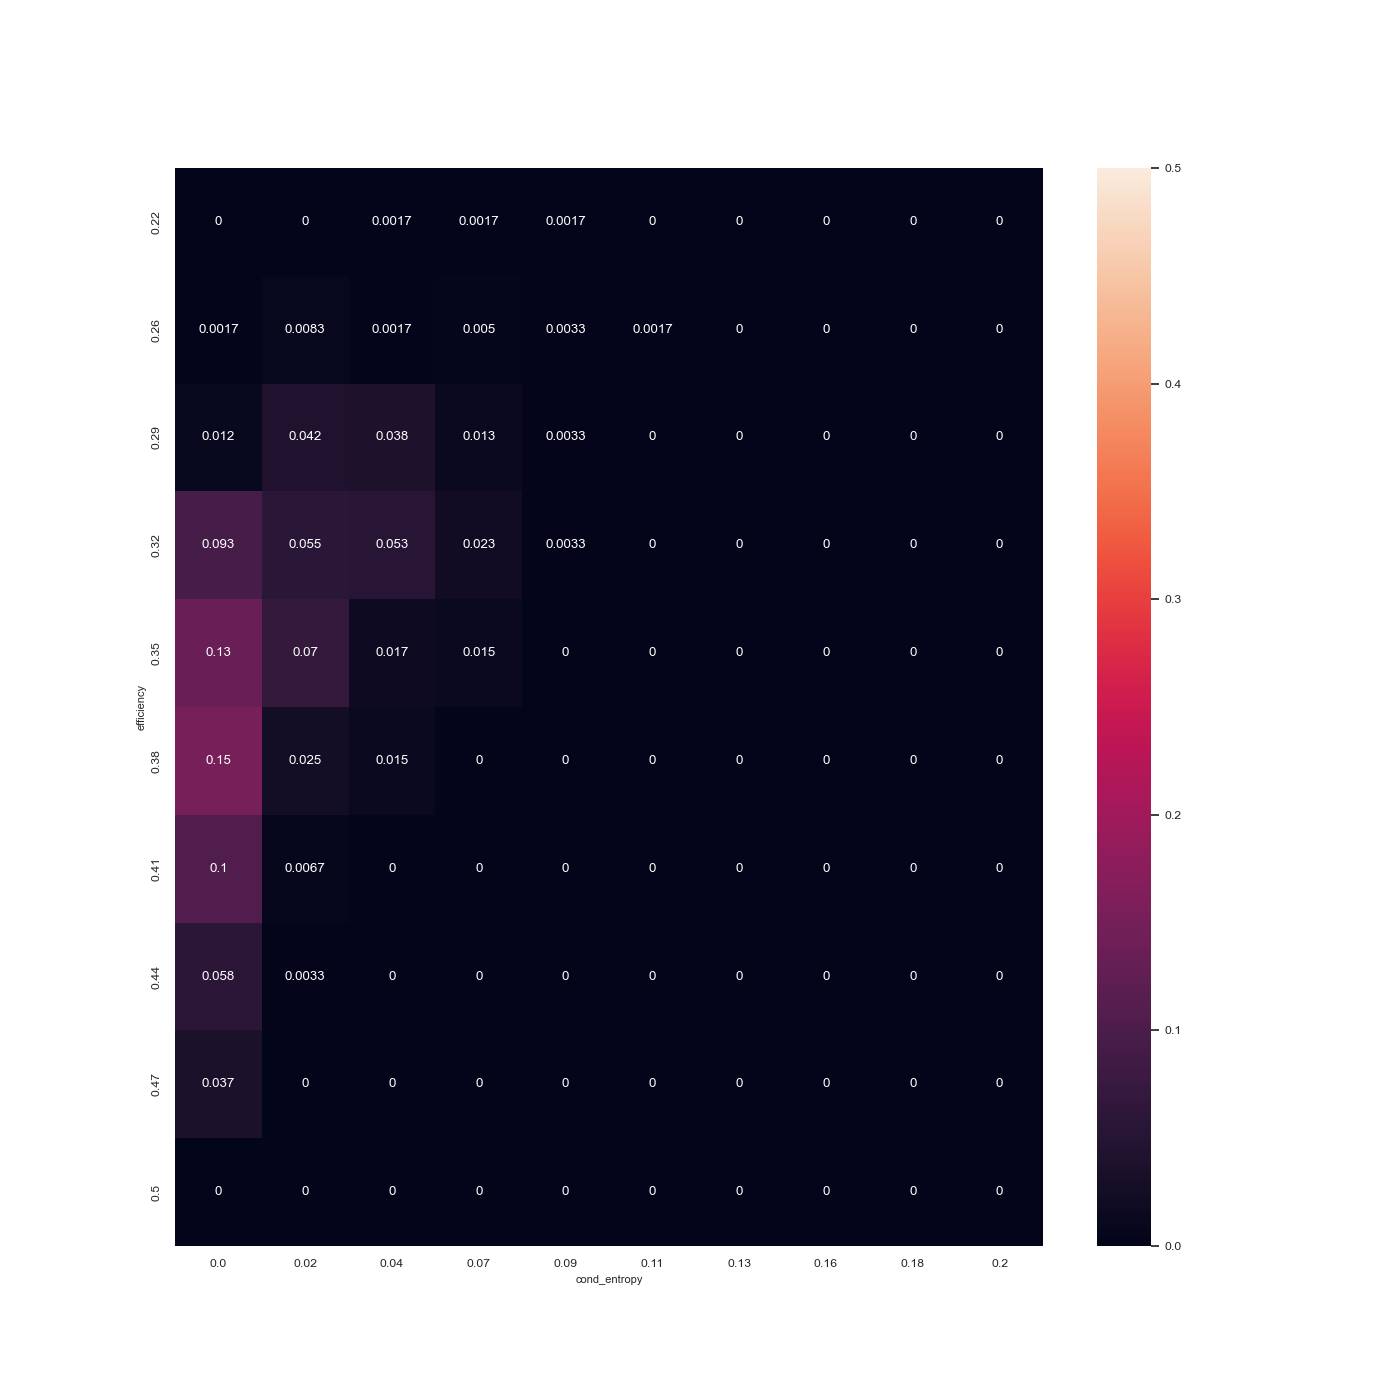

In [108]:
fig0, ax = plt.subplots(figsize=(14,14))
sns.heatmap(lefce, ax=ax, xticklabels=[str(round(i,2)) for i in y],yticklabels=[str(round(i,2)) for i in x], vmin=0,vmax=0.5,annot=lefce)
ax.set_ylabel('efficiency',fontsize=8)
ax.set_xlabel('cond_entropy',fontsize=8)
fname = ifile[28:].rstrip('.dat')+'.png'
plt.savefig(plot_folder+plot_subfolder1+'eff_centropy/eff_centropy_'+fname)

In [109]:
nbins = 10
xinf = df_tsne_res['inequality'].min()
xsup = 0.5 #df_tsne_res['efficiency'].max()
yinf = df_tsne_res['cond_entropy'].min()
ysup = 0.2 #df_tsne_res['cond_entropy'].max()
x = np.linspace(xinf,xsup,nbins)
y = np.linspace(yinf,ysup,nbins)
lefce = np.zeros((nbins,nbins))
for i in range(nbins-1):
    for j in range(nbins-1):
        df_1 = df_tsne_res[(df_tsne_res['inequality']>=x[i]) & (df_tsne_res['inequality']<=x[i+1]) &
                           (df_tsne_res['cond_entropy']>=y[j]) & (df_tsne_res['cond_entropy']<=y[j+1])]
        lefce[i,j] = df_1.shape[0]/df.shape[0]

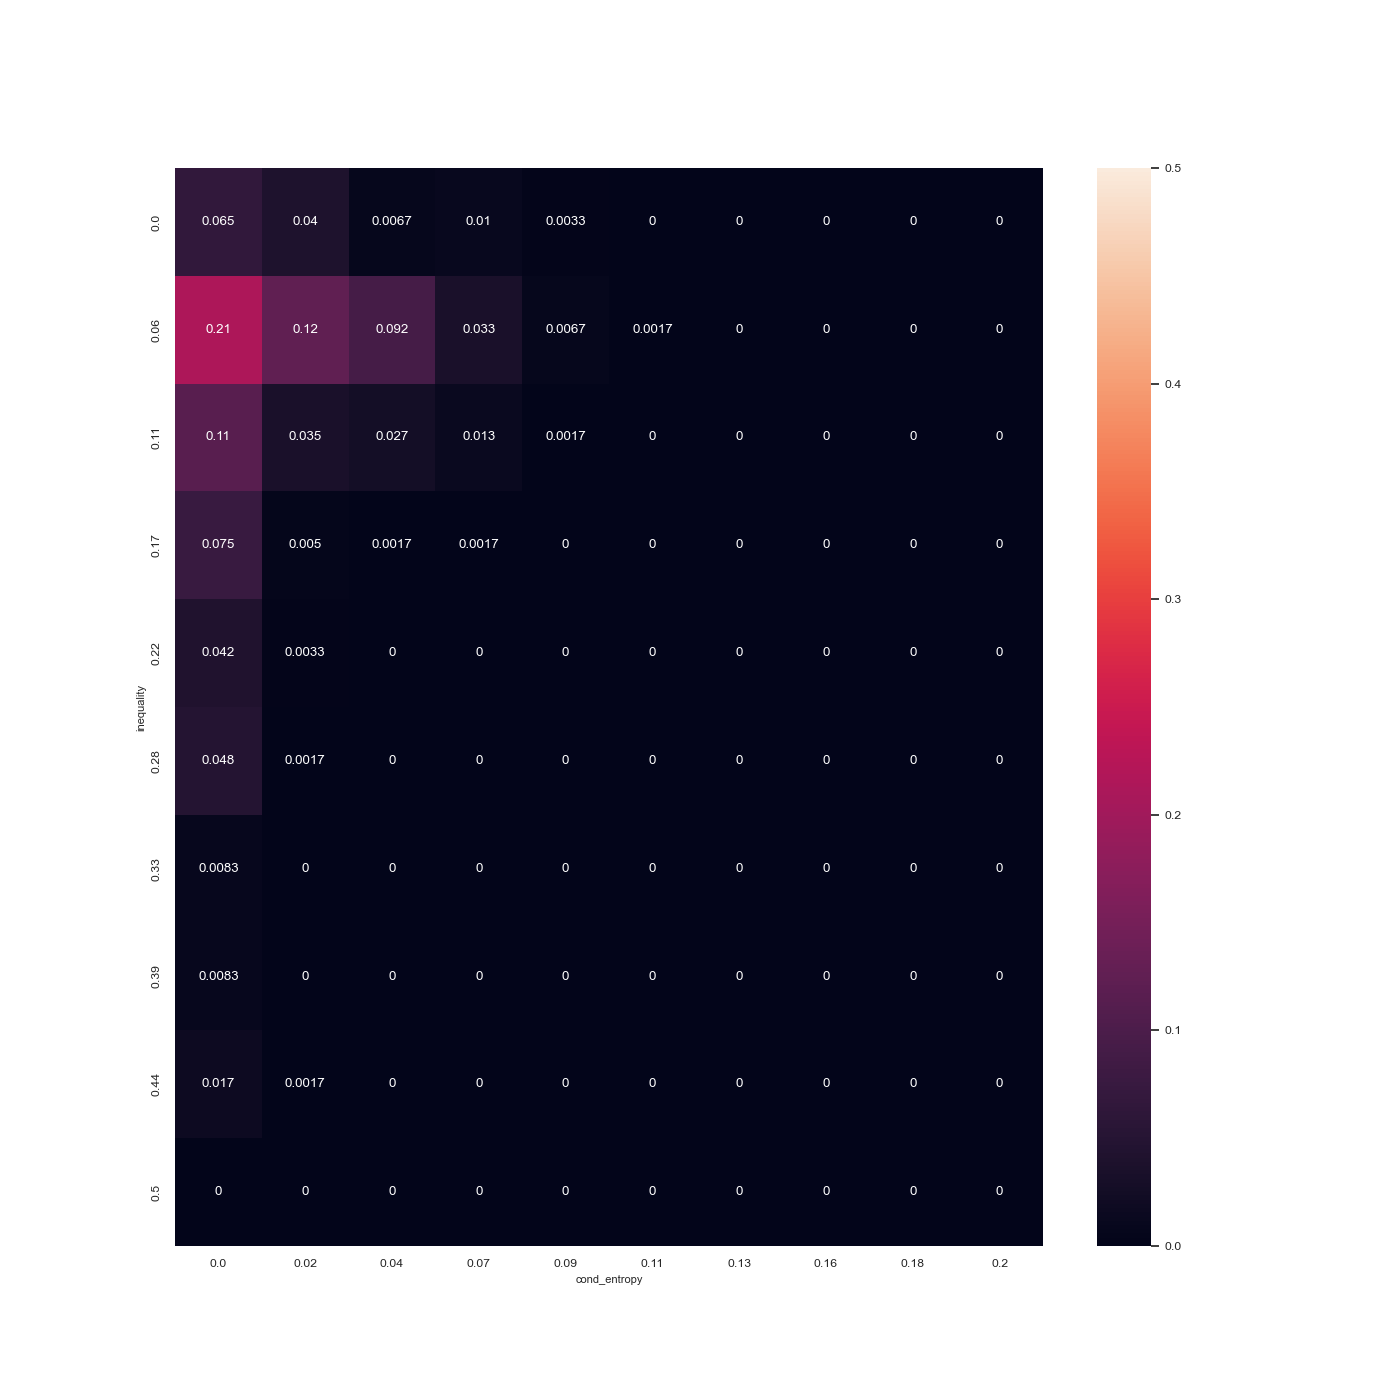

In [110]:
fig1, ax = plt.subplots(figsize=(14,14))
sns.heatmap(lefce, ax=ax, xticklabels=[str(round(i,2)) for i in y],yticklabels=[str(round(i,2)) for i in x], vmin=0,vmax=0.5,annot=lefce)
ax.set_ylabel('inequality',fontsize=8)
ax.set_xlabel('cond_entropy',fontsize=8)
fname = ifile[28:].rstrip('.dat')+'.png'
plt.savefig(plot_folder+plot_subfolder1+'ineq_centropy/ineq_centropy_'+fname)

In [111]:
nbins = 10
xinf = df_tsne_res['efficiency'].min()
xsup = 0.5 #df_tsne_res['efficiency'].max()
yinf = df_tsne_res['inequality'].min()
ysup = 0.5 #df_tsne_res['cond_entropy'].max()
x = np.linspace(xinf,xsup,nbins)
y = np.linspace(yinf,ysup,nbins)
lefce = np.zeros((nbins,nbins))
for i in range(nbins-1):
    for j in range(nbins-1):
        df_1 = df_tsne_res[(df_tsne_res['efficiency']>=x[i]) & (df_tsne_res['efficiency']<=x[i+1]) & 
                           (df_tsne_res['inequality']>=y[j]) & (df_tsne_res['inequality']>=y[j+1])]
        lefce[i,j] = df_1.shape[0]/df.shape[0]

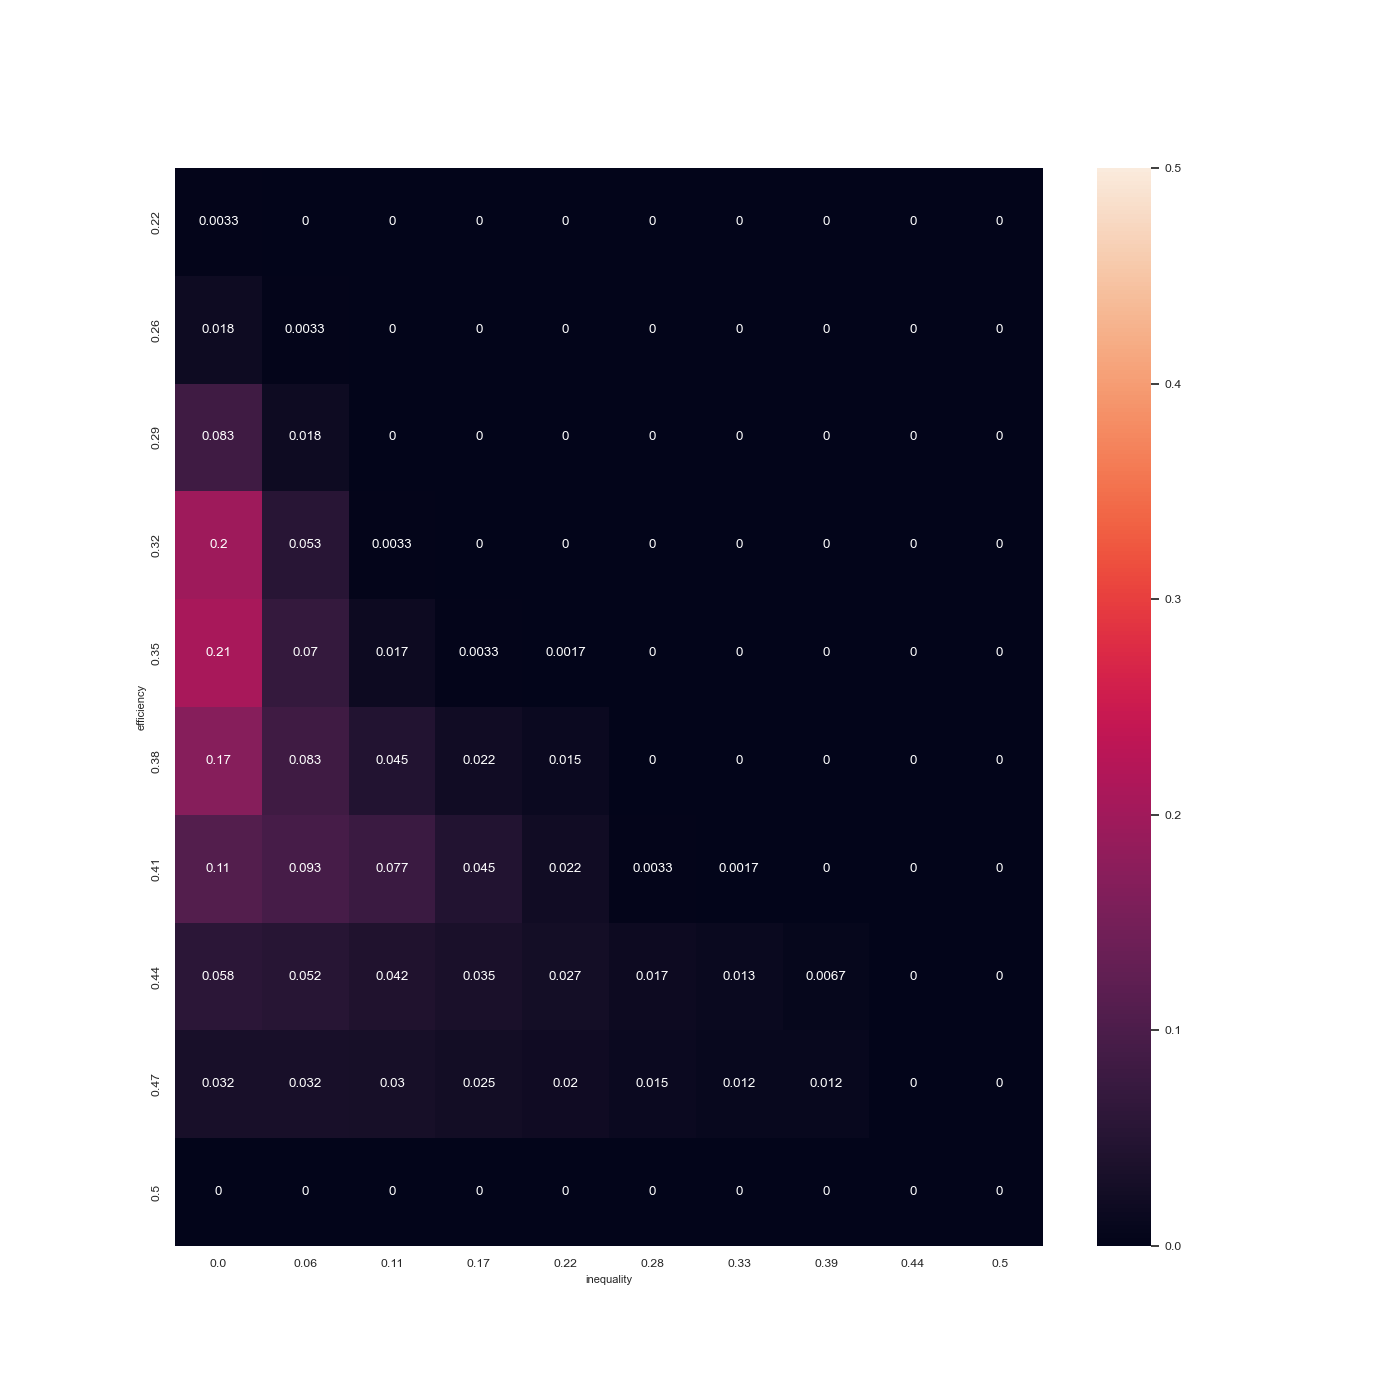

In [112]:
fig2, ax = plt.subplots(figsize=(14,14))
sns.heatmap(lefce, ax=ax, xticklabels=[str(round(i,2)) for i in y],yticklabels=[str(round(i,2)) for i in x], vmin=0,vmax=0.5,annot=lefce)
ax.set_ylabel('efficiency',fontsize=8)
ax.set_xlabel('inequality',fontsize=8)
fname = ifile[28:].rstrip('.dat')+'.png'
plt.savefig(plot_folder+plot_subfolder1+'eff_ineq/eff_ineq_'+fname)

In [113]:
df_tsne_res[(df_tsne_res['tsne_1']>-30) & (df_tsne_res['tsne_1']<29) & (df_tsne_res['tsne_2']>-23) & (df_tsne_res['tsne_2']<-22)]

,tsne_1,tsne_2,efficiency,inequality,n_efficiency,n_inequality,entropy,cond_entropy,frequency,info_per_agent,int_entropy,ineq_slope,emax_perc
27,18.666538,-22.944769,0.397907,0.322607,0.086168,0.069651,0.041875,0.007854,1.000000,0.316667,0.992840,0.000057,0.9815
78,17.026119,-22.942001,0.467994,0.464575,0.082865,0.082260,0.055792,0.015200,1.000000,0.000000,0.987847,0.000005,0.9740
92,-25.593847,-22.207083,0.403417,0.109164,0.132878,0.035686,0.340636,0.002602,0.250000,2.000000,0.998377,0.000024,0.9975
114,-21.496359,-22.499218,0.348595,0.108885,0.111855,0.034858,0.315024,0.069175,0.200000,0.466667,0.753284,-0.000024,0.2920
173,-26.181192,-22.099834,0.394160,0.090251,0.135455,0.030986,0.333333,0.000000,0.250000,1.666667,0.999500,0.000009,1.0000
203,19.577049,-22.324564,0.415958,0.349831,0.084572,0.071008,0.030998,0.007296,1.000000,0.000000,0.995173,0.000049,0.9920
268,18.003435,-22.527641,0.462045,0.447509,0.083835,0.081193,0.044009,0.012261,1.000000,0.150000,0.990820,0.000013,0.9790
310,20.117153,-22.655493,0.427056,0.317708,0.089268,0.066170,0.028235,0.007298,1.000000,0.000000,0.995091,0.000060,0.9910
443,19.002207,-22.769894,0.483885,0.383519,0.089999,0.071271,0.039039,0.008252,1.000000,0.233333,0.994910,0.000035,0.9860
470,20.717794,-22.572952,0.416008,0.301740,0.094587,0.068164,0.018335,0.005698,1.000000,0.000000,0.996742,0.000069,0.9920


In [114]:
## Percent of segmented simulations
#mx = df_tsne_res['inequality'].max()
#mn = 0.95*mx
#df_seg = df_tsne_res[(df_tsne_res['inequality']>mn) & (df_tsne_res['emax_perc']>0.95)]
#df_seg.shape[0]/df.shape[0]

In [115]:
## Percent of alternating simulations
#mx = df_tsne_res['inequality'].max()
#mn = 0.05*mx
#df_alt = df_tsne_res[(df_tsne_res['inequality']<mn) & (df_tsne_res['emax_perc']>0.95)]
#df_alt.shape[0]/df.shape[0]

In [116]:
##Clusters
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

n_max = 0
max_silh = -1.e6
for n_clusters in range(2,21):
    kmeans = KMeans(
        n_clusters=n_clusters, 
        random_state=0, 
        n_init='auto'
    ).fit(X_dat)

    silhouette_avg = silhouette_score(X_dat, kmeans.labels_)
    if silhouette_avg > max_silh:
        max_silh = silhouette_avg
        n_max = n_clusters
    print(n_clusters, silhouette_avg)

2 0.594678610069838
3 0.5668803095731146
4 0.5073136594190968
5 0.5064630593154049
6 0.518252104565246
7 0.5060262004608397
8 0.4751926572220198
9 0.4607307985870919
10 0.45913454365589373
11 0.44197967878537664
12 0.43910780167416985
13 0.4275367055716495
14 0.41371408395172493
15 0.4033544800935086
16 0.3906877251289746
17 0.3851129923618577
18 0.3871691468789501
19 0.3793257813660735
20 0.3756061673531267


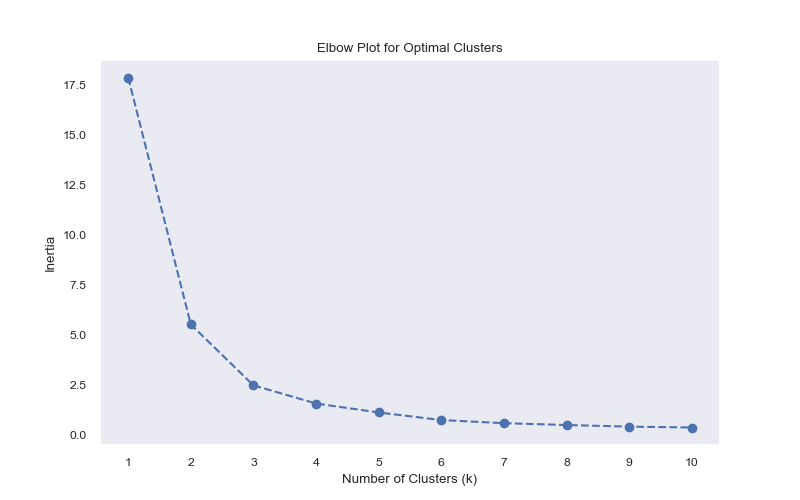

In [117]:
#from sklearn.datasets import make_blobs

## Generate synthetic data for demonstration
## Replace this with your actual dataset (X)
#X, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

# Function to compute inertia for different numbers of clusters
def plot_elbow(X, max_clusters=10):
    inertia = []
    cluster_range = range(1, max_clusters + 1)

    # Compute K-Means for different cluster counts
    for k in cluster_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)

    # Plot the elbow plot
    plt.figure(figsize=(8, 5))
    plt.plot(cluster_range, inertia, marker='o', linestyle='--')
    plt.title('Elbow Plot for Optimal Clusters')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.xticks(cluster_range)
    plt.grid()
    plt.show()

# Call the function to plot the elbow
plot_elbow(X_dat, max_clusters=10)

In [118]:
kmeans = KMeans(
        n_clusters=4, 
        random_state=0, 
        n_init='auto'
    ).fit(X_dat)

df_tsne_res['kmeans'] = kmeans.labels_

In [119]:
df_tsne_res.to_csv("tsne_params.csv",index=False)

## Plot results

In [120]:
lab1 = 'efficiency'
lab2 = 'cond_entropy'
lab3 = 'inequality'
lab4 = 'kmeans'

In [121]:
#idx = 449
#point = [df_tsne_res['tsne_1'][idx], df_tsne_res['tsne_2'][idx]]
#point

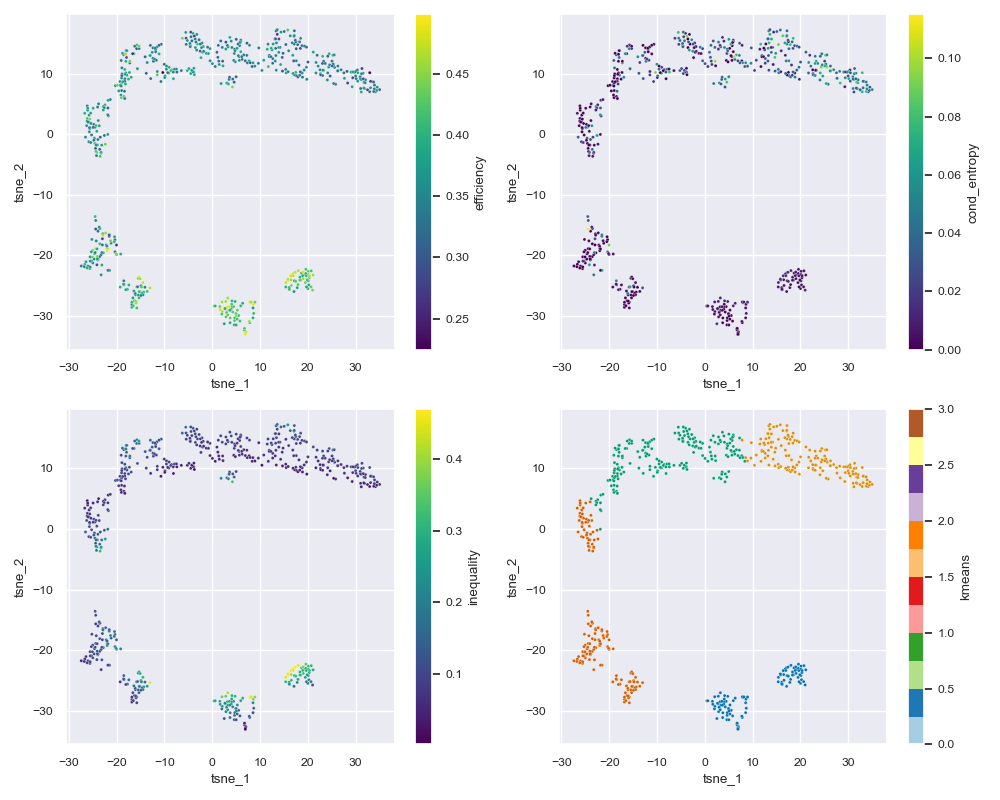

In [122]:
#2D plots
fig1, axis = plt.subplots(nrows=2, ncols=2, figsize=(10,8))

ax1 = sns.scatterplot(data=df_tsne_res, ax=axis[0][0], x='tsne_1', y='tsne_2', hue=lab1, palette='viridis',s=5)
norm1 = plt.Normalize(df_tsne_res[lab1].min(), df_tsne_res[lab1].max())
sm1 = plt.cm.ScalarMappable(cmap="viridis", norm=norm1)
sm1.set_array([])
ax1.get_legend().remove()
cb1 = plt.colorbar(mappable=sm1, ax=ax1)
cb1.set_label(lab1)

ax2 = sns.scatterplot(data=df_tsne_res, ax=axis[0][1], x='tsne_1', y='tsne_2', hue=lab2, palette='viridis',s=5)
norm2 = plt.Normalize(df_tsne_res[lab2].min(), df_tsne_res[lab2].max())
sm2 = plt.cm.ScalarMappable(cmap="viridis", norm=norm2)
sm2.set_array([])
ax2.get_legend().remove()
cb2 = plt.colorbar(mappable=sm2, ax=ax2)
cb2.set_label(lab2)

ax3 = sns.scatterplot(data=df_tsne_res, ax=axis[1][0], x='tsne_1', y='tsne_2', hue=lab3, palette='viridis',s=5)
norm3 = plt.Normalize(df_tsne_res[lab3].min(), df_tsne_res[lab3].max())
sm3 = plt.cm.ScalarMappable(cmap="viridis", norm=norm3)
sm3.set_array([])
ax3.get_legend().remove()
cb3 = plt.colorbar(mappable=sm3, ax=ax3)
cb3.set_label(lab3)

ax4 = sns.scatterplot(data=df_tsne_res, ax=axis[1][1], x='tsne_1', y='tsne_2', hue=lab4, palette='colorblind',s=5)
#sns.scatterplot(ax=axis[1][1], x=np.array([point[0]]), y=np.array([point[1]]), marker='x',color='b',s=100)
norm4 = plt.Normalize(df_tsne_res[lab4].min(), df_tsne_res[lab4].max())
sm4 = plt.cm.ScalarMappable(cmap="Paired", norm=norm4)
sm4.set_array([])
ax4.get_legend().remove()
cb4 = plt.colorbar(mappable=sm4, ax=ax4)
cb4.set_label(lab4)

plt.tight_layout()

In [123]:
#df_tsne_res[df_tsne_res['kmeans']==0]

# 3D

## t-sne

In [124]:
# # Get t-sne embeding with 3 dimensions
# tsne3 = TSNE(3,perplexity=30,random_state=123)
# tsne_result3 = tsne3.fit_transform(X_dat)
# tsne_result3.shape

In [125]:
# df_tsne_res3 = pd.DataFrame({'tsne_1': tsne_result3[:,0], 'tsne_2': tsne_result3[:,1], 'tsne_3': tsne_result3[:,2]})
# df_tsne_res3 = df_tsne_res3.join(df)
# df_tsne_res3.head()

## Plot results

In [126]:
# #3D plots

# fig = plt.figure(figsize=(14,14))
# ax1 = fig.add_subplot(2,2,1,projection='3d')
# fig.add_axes(ax1)
# sc1 = ax1.scatter(df_tsne_res3.tsne_1,df_tsne_res3.tsne_2,df_tsne_res3.tsne_3, c=df_tsne_res3[lab1], cmap='viridis')#, vmin=-200, vmax=200)
# ax1.set_xlabel('tsne_1')
# ax1.set_ylabel('tsne_2')
# ax1.set_zlabel('tsne_3')
# cbar1 = plt.colorbar(sc1)
# cbar1.set_label(lab1)

# ax2 = fig.add_subplot(2,2,2,projection='3d')
# fig.add_axes(ax2)
# sc2 = ax2.scatter(df_tsne_res3.tsne_1,df_tsne_res3.tsne_2,df_tsne_res3.tsne_3, c=df_tsne_res3[lab2], cmap='viridis')
# ax2.set_xlabel('tsne_1')
# ax2.set_ylabel('tsne_2')
# ax2.set_zlabel('tsne_3')
# cbar2 = plt.colorbar(sc2)
# cbar2.set_label(lab2)

# ax3 = fig.add_subplot(2,2,3,projection='3d')
# fig.add_axes(ax3)
# sc3 = ax3.scatter(df_tsne_res3.tsne_1,df_tsne_res3.tsne_2,df_tsne_res3.tsne_3, c=df_tsne_res3[lab3], cmap='viridis')
# ax3.set_xlabel('tsne_1')
# ax3.set_ylabel('tsne_2')
# ax3.set_zlabel('tsne_3')
# cbar3 = plt.colorbar(sc3)
# cbar3.set_label(lab3)

# ax4 = fig.add_subplot(2,2,4,projection='3d')
# fig.add_axes(ax4)
# sc4 = ax4.scatter(df_tsne_res3.tsne_1,df_tsne_res3.tsne_2,df_tsne_res3.tsne_3, c=df_tsne_res3[lab4], cmap='viridis')
# ax4.set_xlabel('tsne_1')
# ax4.set_ylabel('tsne_2')
# ax4.set_zlabel('tsne_3')
# cbar4 = plt.colorbar(sc4)
# cbar4.set_label(lab4)



# #plt.show()

In [127]:
#af = AffinityPropagation(damping=0.8,max_iter=3000,preference=-3, random_state=0).fit(X_dat)
#cluster_centers_indices = af.cluster_centers_indices_
#labels = af.labels_
#n_clusters = len(cluster_centers_indices)
#n_clusters, len(np.unique(labels))

In [128]:
##3D plot clustering
#lab = 'labels'

#fig0 = plt.figure(figsize=(8,8))
#ax = Axes3D(fig0)
#fig0.add_axes(ax)

#sc = ax.scatter(df_tsne_res3.tsne_1,df_tsne_res3.tsne_2,df_tsne_res3.tsne_3, c=labels, cmap='Paired')#cmap='tab20')
#ax.set_xlabel('tsne_1')
#ax.set_ylabel('tsne_2')
#ax.set_zlabel('tsne_3')
#cbar = plt.colorbar(sc)
#cbar.set_label(lab)

##plt.show()

In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
#from sklearn.datasets import make_classification

# # Generate synthetic data for demonstration
# # Replace this with your actual dataset
# X, y = make_classification(
#    n_samples=1000,
#    n_features=5,
#    n_informative=3,
#    n_classes=3,
#    n_clusters_per_class=1,
#    random_state=42
# )

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_dat, kmeans.labels_, test_size=0.3, random_state=42)

# Initialize the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       0.85      1.00      0.92        45
           2       0.75      0.87      0.80        61
           3       1.00      0.63      0.78        52

    accuracy                           0.85       181
   macro avg       0.89      0.88      0.87       181
weighted avg       0.87      0.85      0.85       181


Confusion Matrix:
[[23  0  0  0]
 [ 0 45  0  0]
 [ 0  8 53  0]
 [ 1  0 18 33]]


/home/carlos/Documents/Information/edgar_german/el_farol/markov_fplay/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [130]:
model.coef_

array([[-0.43921736,  0.45144257, -7.80433279],
       [ 0.2302395 , -0.17163015,  7.78953983],
       [ 0.34395886, -0.29609124,  2.33704865],
       [-0.13498099,  0.01627882, -2.32225569]])